# Schelling's Segregation Model

In [1]:
%matplotlib inline
from random import seed
seed(10)

The Model
=======================

We will cover a variation of Schelling's model that is easy to program and captures the main idea

Set Up
---------

Suppose we have two types of people: orange people and green people

For the purpose of this lecture, we will assume there are 250 of each type

These agents all live on a single unit square

The location of an agent is just a point $(x, y)$,  where $0 < x, y < 1$

Preferences
-------------

We will say that an agent is *happy* if half or more of her 10 nearest neighbors are of the same type

Here 'nearest' is in terms of [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)

An agent who is not happy is called *unhappy*

An important point here is that agents are not averse to living in mixed areas

They are perfectly happy if half their neighbors are of the other color


Behavior
-----------

Initially, agents are mixed together (integrated)

In particular, the initial location of each agent is an independent draw from a bivariate uniform distribution on $S = (0, 1)^2$

Now, cycling through the set of all agents, each agent is now given the chance to stay or move

We assume that each agent will stay put if they are happy and move if unhappy

The algorithm for moving is as follows

  1. Draw a random location in $S$

  1. If happy at new location, move there

  1. Else, go to step 1

In this way, we cycle continuously through the agents, moving as required

We continue to cycle until no one wishes to move

In [2]:
#-Construct Agents and Support Functions-#
%run schelling.py

Entering loop  1


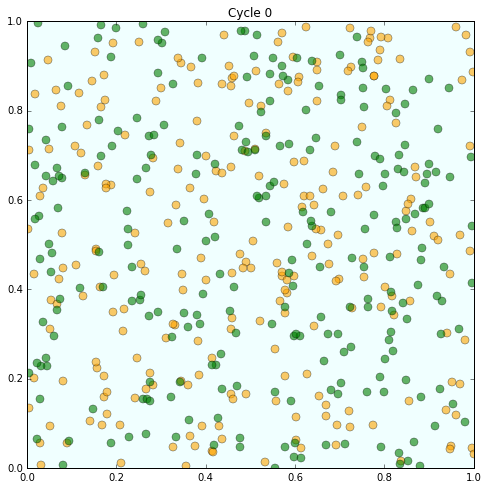

Entering loop  2


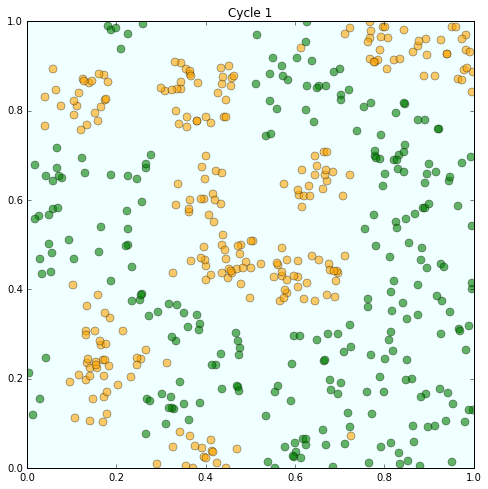

Entering loop  3


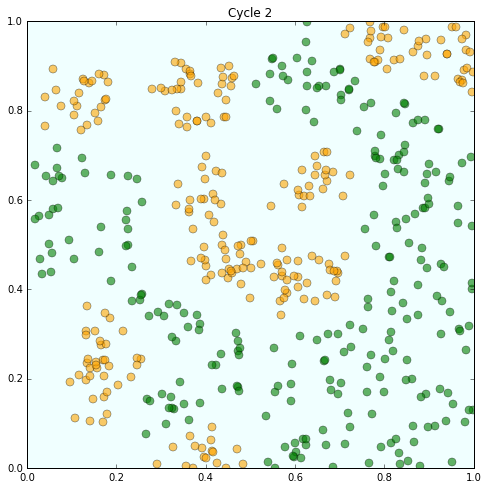

Converged, terminating.


In [3]:
# == Main == #
num_of_type_0 = 250
num_of_type_1 = 250
num_neighbors = 10      # Number of agents regarded as neighbors
require_same_type = 7   # Want at least this many neighbors to be same type

# == Create a list of agents == #
agents = [Agent(0, num_neighbors, require_same_type) for i in range(num_of_type_0)]
agents.extend(Agent(1, num_neighbors, require_same_type) for i in range(num_of_type_1))

count = 1
# ==  Loop until none wishes to move == #
while 1:
    print('Entering loop ', count)
    plot_distribution(agents, count)
    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break
        
print('Converged, terminating.')